In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# Charger les données
df = pd.read_csv("train.csv")

In [3]:
X = df.drop(columns=["Price"])
y = df["Price"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
numeric_features = X.select_dtypes(include=["float64", "int64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

In [10]:
# Transformer pour les caractéristiques numériques
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Transformer pour les caractéristiques catégorielles
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

In [12]:
model = LinearRegression()

In [13]:
from sklearn.feature_selection import RFE

selector = RFE(estimator=model)

In [21]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

In [22]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Year', 'Kilometers_Driven', 'Seats'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Faire des prédictions sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculer la racine de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculer le coefficient de détermination (R²)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

Mean Squared Error (MSE): 23.879381559280827
Root Mean Squared Error (RMSE): 4.886653411004389
R² Score: 0.8059525422061811


In [24]:
# Get the transformed features after preprocessing
transformed_features = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Print the transformed features
print("Transformed Features:", transformed_features)

Transformed Features: ['num__Year' 'num__Kilometers_Driven' 'num__Seats' ...
 'cat__New_Price_92.79 Lakh' 'cat__New_Price_95.04 Lakh'
 'cat__New_Price_95.13 Lakh']


In [29]:
transformed_features[:10]

array(['num__Year', 'num__Kilometers_Driven', 'num__Seats',
       'cat__Name_Audi A3 35 TDI Attraction',
       'cat__Name_Audi A3 35 TDI Premium',
       'cat__Name_Audi A3 35 TDI Premium Plus',
       'cat__Name_Audi A3 35 TDI Technology',
       'cat__Name_Audi A4 1.8 TFSI',
       'cat__Name_Audi A4 1.8 TFSI Technology Edition',
       'cat__Name_Audi A4 2.0 TDI'], dtype=object)

In [30]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
 
sns.heatmap(corr, mask=mask, cmap=cmap,  center=0, square=True, linewidths=.5,cbar_kws={"shrink": .5},  annot=True)

ValueError: could not convert string to float: 'Maruti Wagon R LXI CNG'

In [32]:
# Get the transformed features after preprocessing
transformed_features = pipeline.named_steps['preprocessor'].transform(X_train)

# Concatenate transformed features with the target variable if necessary
# For example, if y_train is your target variable:
# transformed_data = pd.concat([pd.DataFrame(transformed_features), y_train], axis=1)

# Calculate the correlation matrix
correlation_matrix = pd.DataFrame(transformed_features).corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

ValueError: setting an array element with a sequence.

In [44]:
import pandas as pd

# Assuming X_original contains the original features
# and X_new contains the new generated features
X_new_df = pd.DataFrame.sparse.from_spmatrix(transformed_features)

# Concatenate the new generated features with the original features
X_concatenated = pd.concat([X_train, X_new_df], axis=1)

# Calculate the correlation matrix
correlation_matrix = X_concatenated.corr()

# Extract the correlation values corresponding to the original features
original_features_correlation = correlation_matrix.loc[X_train.columns, X_train.columns]

# Print the correlation matrix for the original features
print("Correlation Matrix for Original Features:")
print(original_features_correlation)


ValueError: could not convert string to float: 'Chevrolet Beat LS'

<4815x3105 sparse matrix of type '<class 'numpy.float64'>'
	with 57780 stored elements in Compressed Sparse Row format>

In [46]:
# Calculate the correlation matrix for the transformed features
transformed_correlation_matrix = pd.DataFrame(X_new_df).corr()

In [45]:
# Get the transformed features after preprocessing

# Calculate the correlation matrix for the transformed features
transformed_correlation_matrix = pd.DataFrame(X_new_df).corr()

# Combine the correlation matrix for the transformed features with the original categorical features
combined_correlation_matrix = pd.concat([original_categorical_correlation_matrix, transformed_correlation_matrix], axis=1)

# Extract the correlation values corresponding to the original features
original_features_correlation = combined_correlation_matrix.loc[X_original.columns, X_original.columns]

# Print the correlation matrix for the original features
print("Correlation Matrix for Original Features:")
print(original_features_correlation)

NameError: name 'original_categorical_correlation_matrix' is not defined

In [47]:
transformed_correlation_matrix

,0,1,2,3,4,5,6,7,8,9,...,3095,3096,3097,3098,3099,3100,3101,3102,3103,3104
0,1.000000,-0.444906,0.004410,0.002675,0.011532,0.011532,0.015960,-0.015038,-0.006181,-0.020328,...,0.011532,0.003784,0.015960,0.002675,0.015960,0.024816,0.024816,0.011532,0.015960,0.037684
1,-0.444906,1.000000,0.217034,0.008392,-0.014375,-0.007078,-0.013608,-0.007461,0.008672,-0.003615,...,-0.007766,0.002225,-0.012455,0.000015,-0.014429,-0.019457,-0.018482,-0.010919,-0.016922,-0.021375
2,0.004410,0.217034,1.000000,-0.004927,-0.004927,-0.004927,-0.004927,-0.004927,-0.004927,-0.019739,...,-0.004927,-0.006969,-0.004927,-0.004927,-0.004927,0.030829,-0.004927,-0.004927,-0.058562,-0.011022
3,0.002675,0.008392,-0.004927,1.000000,-0.000208,-0.000208,-0.000208,-0.000208,-0.000208,-0.000832,...,-0.000208,-0.000294,-0.000208,-0.000208,-0.000208,-0.000208,-0.000208,-0.000208,-0.000208,-0.000465
4,0.011532,-0.014375,-0.004927,-0.000208,1.000000,-0.000208,-0.000208,-0.000208,-0.000208,-0.000832,...,-0.000208,-0.000294,-0.000208,-0.000208,-0.000208,-0.000208,-0.000208,-0.000208,-0.000208,-0.000465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3100,0.024816,-0.019457,0.030829,-0.000208,-0.000208,-0.000208,-0.000208,-0.000208,-0.000208,-0.000832,...,-0.000208,-0.000294,-0.000208,-0.000208,-0.000208,1.000000,-0.000208,-0.000208,-0.000208,-0.000465
3101,0.024816,-0.018482,-0.004927,-0.000208,-0.000208,-0.000208,-0.000208,-0.000208,-0.000208,-0.000832,...,-0.000208,-0.000294,-0.000208,-0.000208,-0.000208,-0.000208,1.000000,-0.000208,-0.000208,-0.000465
3102,0.011532,-0.010919,-0.004927,-0.000208,-0.000208,-0.000208,-0.000208,-0.000208,-0.000208,-0.000832,...,-0.000208,-0.000294,-0.000208,-0.000208,-0.000208,-0.000208,-0.000208,1.000000,-0.000208,-0.000465
3103,0.015960,-0.016922,-0.058562,-0.000208,-0.000208,-0.000208,-0.000208,-0.000208,-0.000208,-0.000832,...,-0.000208,-0.000294,-0.000208,-0.000208,-0.000208,-0.000208,-0.000208,-0.000208,1.000000,-0.000465


In [54]:
df[numeric_features]

,Year,Kilometers_Driven,Seats
0,2010,72000,5.0
1,2015,41000,5.0
2,2011,46000,5.0
3,2012,87000,7.0
4,2013,40670,5.0
...,...,...,...
6014,2014,27365,5.0
6015,2015,100000,5.0
6016,2012,55000,8.0
6017,2013,46000,5.0


In [57]:
df_train = X_train

In [59]:
import re 
# Convertir les colonnes 'Mileage', 'Engine' et 'Power' en chaînes de caractères
df_train['Mileage'] = df_train['Mileage'].astype(str)
df_train['Engine'] = df_train['Engine'].astype(str)
df_train['Power'] = df_train['Power'].astype(str)

# Supprimer les lettres et garder que les chiffres dans 'Mileage', 'Engine' et 'Power'
df_train['Mileage'] = df_train['Mileage'].apply(lambda x: re.sub(r'[^\d.]', '', x))
df_train['Engine'] = df_train['Engine'].apply(lambda x: re.sub(r'[^\d.]', '', x))
df_train['Power'] = df_train['Power'].apply(lambda x: re.sub(r'[^\d.]', '', x))

# Afficher le DataFrame après les modifications
df_train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
4248,Chevrolet Beat LS,Delhi,2011,76155,Petrol,Manual,First,18.6,1199,79.4,5.0,NaN
4129,Ford EcoSport 1.5 TDCi Titanium,Coimbatore,2014,64637,Diesel,Manual,First,22.77,1498,98.59,5.0,NaN
2534,Maruti Vitara Brezza ZDi,Kolkata,2018,2900,Diesel,Manual,First,24.3,1248,88.5,5.0,10.13 Lakh
2893,Toyota Innova 2.5 VX (Diesel) 8 Seater,Delhi,2011,150000,Diesel,Manual,First,12.99,2494,100.6,8.0,NaN
2860,Tata Bolt Quadrajet XM,Hyderabad,2017,98500,Diesel,Manual,First,22.95,1248,74,5.0,7.97 Lakh
...,...,...,...,...,...,...,...,...,...,...,...,...
3772,Nissan Sunny 2011-2014 XL AT Special Edition,Chennai,2015,27000,Petrol,Automatic,First,17.97,1498,99.6,5.0,NaN
5191,Ford Endeavour 2.2 Titanium AT 4X2,Chennai,2019,9000,Diesel,Automatic,First,12.62,2198,158,7.0,NaN
5226,Mahindra XUV500 W8 2WD,Hyderabad,2013,140000,Diesel,Manual,Second,15.1,2179,140,7.0,NaN
5390,Honda Amaze S i-Dtech,Jaipur,2014,76414,Diesel,Manual,First,25.8,1498,98.6,5.0,NaN


In [110]:
# Data Cleanining 

In [149]:
# Charger les données
df = pd.read_csv("train.csv")

In [150]:
import re 
df = df.drop(columns=["New_Price"])

# Convertir les colonnes 'Mileage', 'Engine' et 'Power' en chaînes de caractères
df['Mileage'] = df['Mileage'].astype(str)
df['Engine'] = df['Engine'].astype(str)
df['Power'] = df['Power'].astype(str)

# Supprimer les lettres et garder que les chiffres dans 'Mileage', 'Engine' et 'Power'
df['Mileage'] = df['Mileage'].apply(lambda x: re.sub(r'[^\d.]', '', x))
df['Engine'] = df['Engine'].apply(lambda x: re.sub(r'[^\d.]', '', x))
df['Power'] = df['Power'].apply(lambda x: re.sub(r'[^\d.]', '', x))

# Afficher le DataFrame après les modifications

In [151]:
df.replace('', np.nan, inplace=True)

df['Year'] = df['Year'].astype("float64")
df['Mileage'] = df['Mileage'].astype("float64")
df['Engine'] = df['Engine'].astype("float64")
df['Power'] = df['Power'].astype("float64")

numeric_features = df.select_dtypes(include=["float64", "int64"]).columns
num_df = df[numeric_features]


In [152]:
num_df

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
0,2010.0,72000,26.60,998.0,58.16,5.0,1.75
1,2015.0,41000,19.67,1582.0,126.20,5.0,12.50
2,2011.0,46000,18.20,1199.0,88.70,5.0,4.50
3,2012.0,87000,20.77,1248.0,88.76,7.0,6.00
4,2013.0,40670,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...
6014,2014.0,27365,28.40,1248.0,74.00,5.0,4.75
6015,2015.0,100000,24.40,1120.0,71.00,5.0,4.00
6016,2012.0,55000,14.00,2498.0,112.00,8.0,2.90
6017,2013.0,46000,18.90,998.0,67.10,5.0,2.65


In [153]:
import numpy as np

# Replace empty strings with NaN values
df_train.replace('', np.nan, inplace=True)

# Now you can convert the 'Year' column to float
df_train['Year'] = df['Year'].astype(float)

# Drop rows with NaN values
df_train.dropna(inplace=True)

# Now the 'Year' column is converted to float and rows with empty strings are dropped


In [154]:
# Check for empty values in any feature for each row
empty_rows = df_train.isnull().any(axis=1)

# Drop rows with at least one empty value
df_train = df_train.dropna(axis=0, how='any')

In [155]:
numeric_features

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [156]:

num_df_correlation_matrix = pd.DataFrame(num_df).corr()

In [157]:
num_df_correlation_matrix

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.173048,0.321565,-0.052197,0.014525,0.012333,0.305327
Kilometers_Driven,-0.173048,1.000000,-0.065253,0.091068,0.033503,0.083113,-0.011493
Mileage,0.321565,-0.065253,1.000000,-0.597699,-0.537729,-0.308226,-0.306593
Engine,-0.052197,0.091068,-0.597699,1.000000,0.866185,0.393337,0.658354
Power,0.014525,0.033503,-0.537729,0.866185,1.000000,0.101562,0.772566
Seats,0.012333,0.083113,-0.308226,0.393337,0.101562,1.000000,0.052225
Price,0.305327,-0.011493,-0.306593,0.658354,0.772566,0.052225,1.000000


In [158]:
#df = df.drop(columns=["Kilometers_Driven"])
#df = df.drop(columns=["Mileage"])
# df = df.drop(columns=["Engine"])
# df = df.drop(columns=["Seats"])


In [159]:
X = df.drop(columns=["Price"])
y = df["Price"]

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
numeric_features = X.select_dtypes(include=["float64", "int64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

In [162]:
# Transformer pour les caractéristiques numériques
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Transformer pour les caractéristiques catégorielles
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [163]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

In [164]:
model = LinearRegression()

In [165]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

In [166]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object'))])),
                ('model', LinearRegression())])

In [169]:
from sklearn.model_selection import cross_val_score

# Train your pipeline on the training data
pipeline.fit(X_train, y_train)

# Perform cross-validation to obtain training scores for each fold
train_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive
train_scores = -train_scores

# Print the training scores for each fold
print("Training Scores for Each Fold:", train_scores)

# Calculate the mean training score
mean_train_score = np.mean(train_scores)
print("Mean Training Score:", mean_train_score)


Training Scores for Each Fold: [ 70.07125083  18.67372054  52.52557699  64.9508655  102.18315248]
Mean Training Score: 61.68091327014646


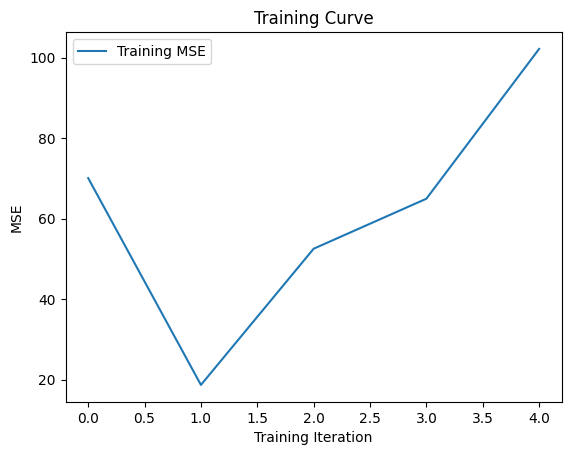

In [171]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Train your pipeline on the training data
pipeline.fit(X_train, y_train)

# Get the training predictions
train_predictions = pipeline.predict(X_train)

# Calculate the training MSE (or any other appropriate metric)
train_mse = mean_squared_error(y_train, train_predictions)

# Get the training scores during each training iteration (if applicable)
# Note: This step depends on the specific training method used in your pipeline

# Plot the training curve
plt.plot(range(len(train_scores)), train_scores, label='Training MSE')
plt.xlabel('Training Iteration')
plt.ylabel('MSE')
plt.title('Training Curve')
plt.legend()
plt.show()

In [170]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Faire des prédictions sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculer la racine de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculer le coefficient de détermination (R²)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

Mean Squared Error (MSE): 70.46465603629957
Root Mean Squared Error (RMSE): 8.39432284560819
R² Score: 0.4273935723915113
